### Load Dependencies

In [20]:
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [21]:
beats = np.load("../data/preprocessed_beats.npy")  # shape: [N, T]
print("Loaded beats:", beats.shape)

Loaded beats: (48174, 360)


### Visualize Sample Beats

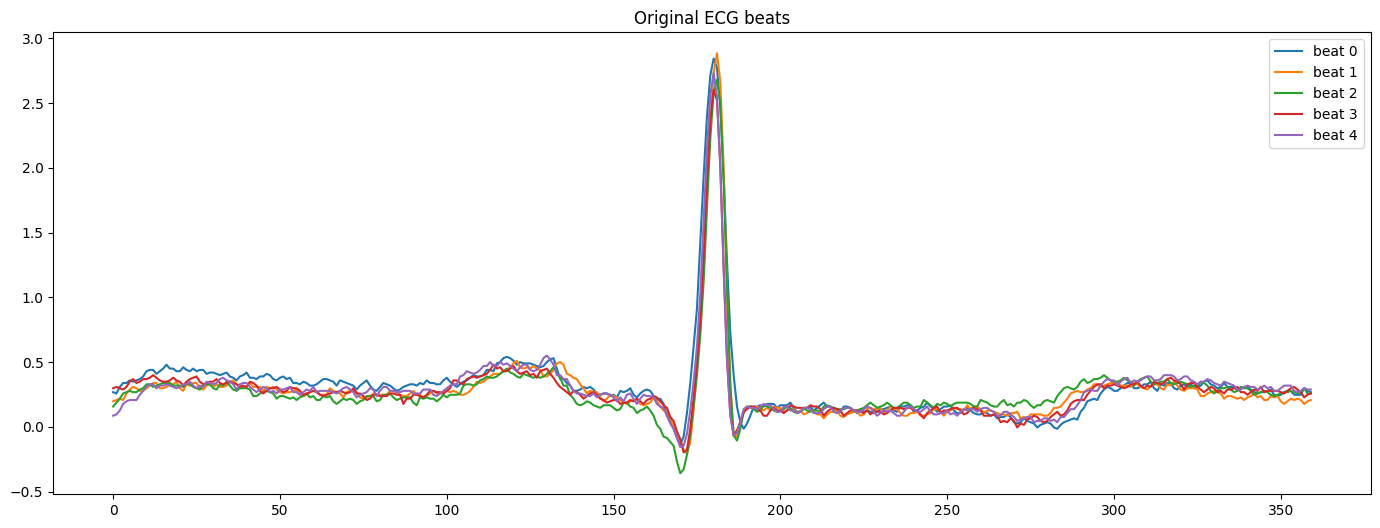

In [22]:
plt.figure(figsize=(17, 6))
for i in range(5):
    plt.plot(beats[i], label=f'beat {i}')
plt.title("Original ECG beats")
plt.legend()
plt.show()

### Bootstrapping

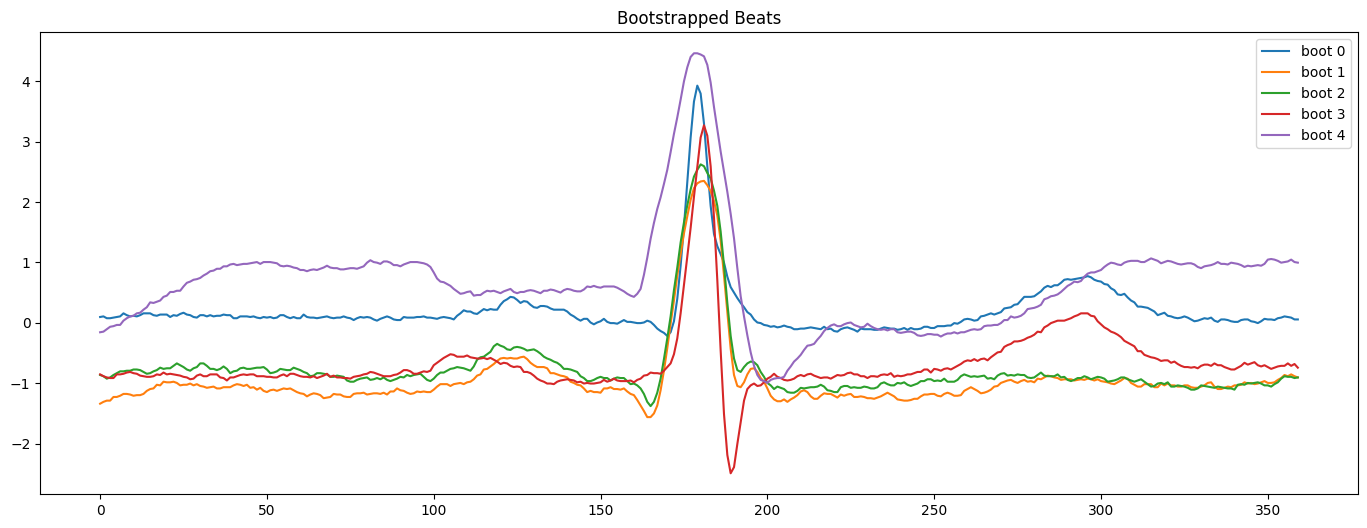

In [23]:
# Simple resampling
np.random.seed(0)
resampled_beats = beats[np.random.choice(len(beats), size=5, replace=True)]

plt.figure(figsize=(17, 6))
for i in range(5):
    plt.plot(resampled_beats[i], label=f'boot {i}')
plt.title("Bootstrapped Beats")
plt.legend()
plt.show()

### Add Jitter / Noise

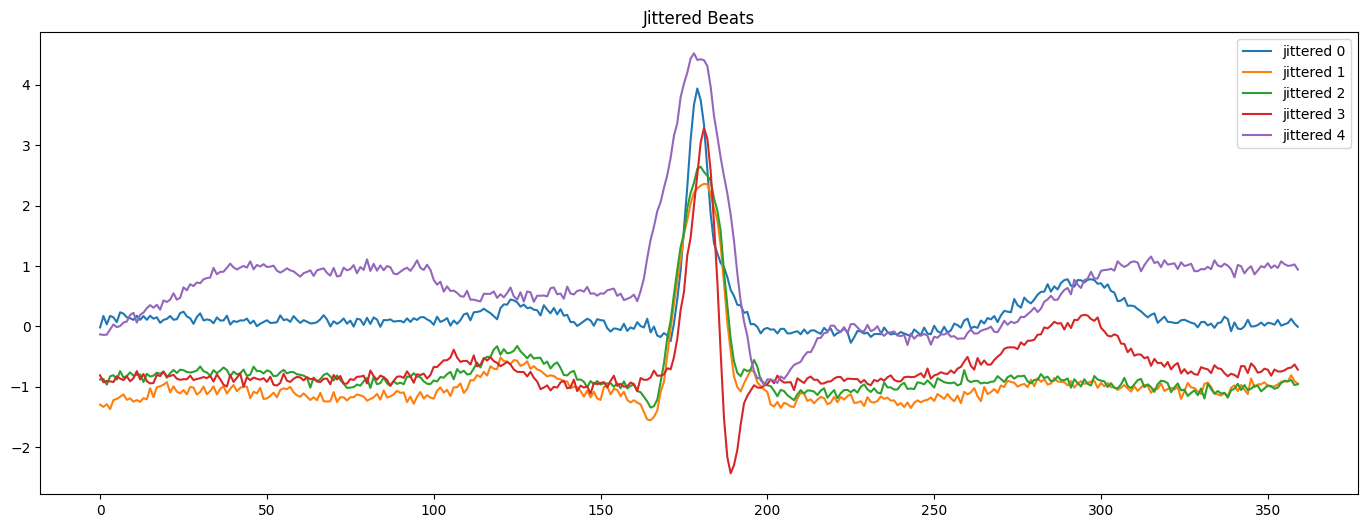

In [24]:
def add_jitter(data, noise_std=0.05):
    noise = np.random.normal(0, noise_std, size=data.shape)
    return data + noise

jittered_beats = add_jitter(resampled_beats)

plt.figure(figsize=(17, 6))
for i in range(5):
    plt.plot(jittered_beats[i], label=f'jittered {i}')
plt.title("Jittered Beats")
plt.legend()
plt.show()

### Parametric Modelling

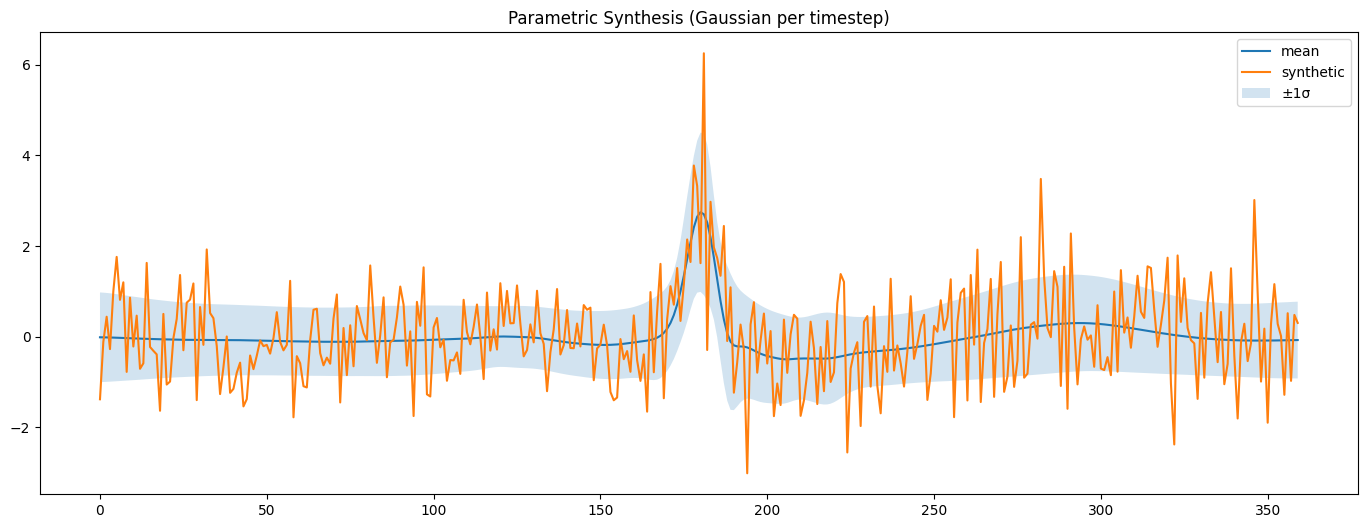

In [27]:
# Estimate a Gaussian per timepoint
mean_waveform = beats.mean(axis=0)
std_waveform = beats.std(axis=0)

# Sample new waveform
synthetic = np.random.normal(loc=mean_waveform, scale=std_waveform)

plt.figure(figsize=(17,6))
plt.plot(mean_waveform, label="mean")
plt.plot(synthetic, label="synthetic")
plt.fill_between(np.arange(len(mean_waveform)), mean_waveform - std_waveform, mean_waveform + std_waveform, alpha=0.2, label="±1σ")
plt.title("Parametric Synthesis (Gaussian per timestep)")
plt.legend()
plt.show()

### SMOTE

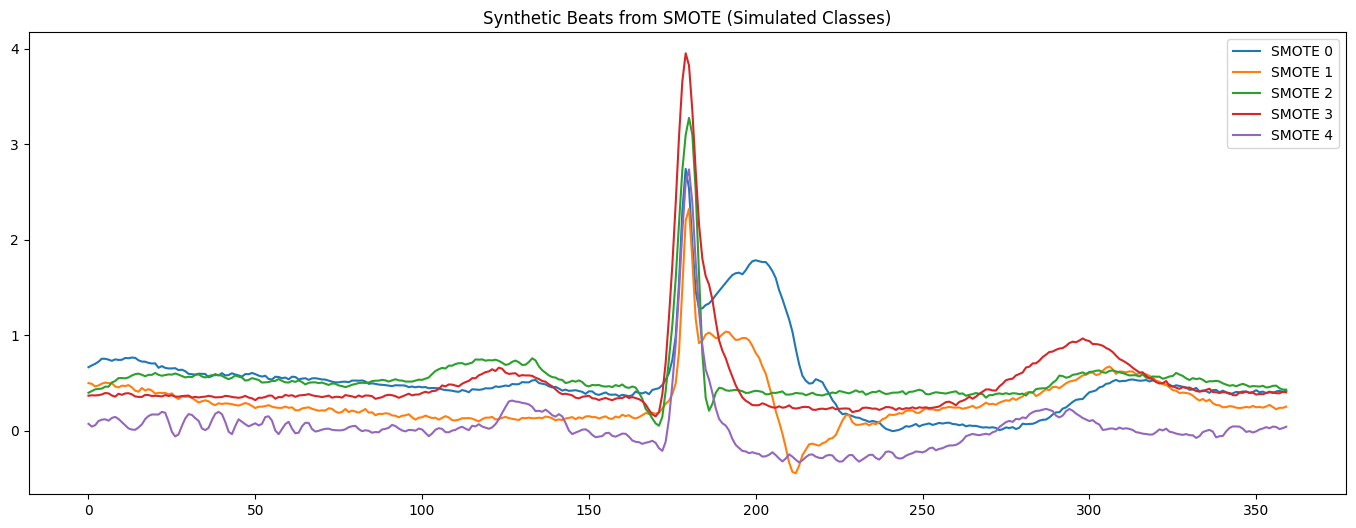

In [26]:
# Simulate two classes (e.g., class 0: normal, class 1: PVC)
X = beats
y = np.zeros(len(beats), dtype=int)
y[len(beats)//5:] = 1  # Assign class 1 to the second half

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize some synthetic beats created by SMOTE
smote_new = X_resampled[len(beats):len(beats)+5]

plt.figure(figsize=(17, 6))
for i in range(5):
    plt.plot(smote_new[i], label=f'SMOTE {i}')
plt.title("Synthetic Beats from SMOTE (Simulated Classes)")
plt.legend()
plt.show()

### Save the Synthetic Beats

In [ ]:
np.save("synthetic_beats_bootstrap.npy", resampled_beats)
np.save("synthetic_beats_jittered.npy", jittered_beats)
np.save("synthetic_beats_parametric.npy", synthetic)
np.save("synthetic_beats_smote.npy", smote_new)